<a href="https://colab.research.google.com/github/kangdoung/CS114.K21/blob/master/BCCK_chitiet_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mô tả bài toán Nhận diện gương mặt người nổi tiếng

## Lí do chọn đề tài 


* Nhận diện khuôn mặt có khá nhiều ứng dụng thực tế và đã được thực hiện như faceid của apple hoặc các hệ thống điểm danh của công ty, trường học, sân bay, nhà ga, ...   
* Để tìm hiểu, học tập và thực hiện bài toán nhận dạng khuôn mặt của 1 người, nhóm đã tự xây dựng bộ dữ liệu gồm 5 người nổi tiếng. Nguyên nhân nhóm quyết định chọn người nổi tiếng là do dữ liệu dễ tìm, đa dạng và được công khai miễn phí.

## Mô tả bộ dữ liệu

* Bộ dữ liệu được crawl từ google image với công cụ DownAlbum của Chrome.
* Bộ dữ liệu gồm 5 người là Trấn Thành, Ninh Dương Lan Ngọc, Nhã Phương, Sơn Tùng và Mỹ Tâm
* Kích cỡ của bộ dữ liệu là 2000 tấm hình với lần lượt mỗi người 400 tấm được chia thành 2 tập train set và test set theo tỉ lệ 80/20. 

## Mô tả bài toán


* Là bài toán **CLASSIFICATION**
* Input: ảnh của một người
* Output: tên của người có trong ảnh.

## Tiền xử lý dữ liệu

* Xác định vị trí khuôn mặt của mỗi người trong ảnh.( với haarcascade_frontalface_default.xml).
* Cắt và giữ lại vị trí của khuôn mặt.

In [ ]:
 def detectFace():
    files = input("Nhập tên folder chứa ảnh mặt đã cắt : ")
    createf = files.replace(".com","")
    name_file = input("Nhập tên file: ") # Nhập tên files muốn lưu
    name_folder = input("Nhập tên folder chứa ảnh cần cắt: ") # Nhập tên folder dẫn đến thư mục chứa ảnh cần cắt mặt
    sampleNum = 0
    path = '/home/lahai/Downloads/MyTam/' # Đường dẫn dẫn đến thư mục muốn cắt ảnh mặt
    path_dir = "paths" # Đường dẫn đến thư mục muốn lưu ảnh mặt
    pathFolder = path + name_folder # Đường dẫn đến thư mục muốn cắt ảnh
    for img1 in os.listdir(pathFolder):
        file_name = pathFolder + '/'+img1
        img = cv2.imread(file_name)
        img = cv2.resize(img,(400,int(img.shape[0]*400/img.shape[1])))
        # Covert ảnh từ BGR sang YUV
        img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
        # Cân bằng xám
        img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])

    # convert the YUV image back to RGB format
        img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
        face = faceCasCade.detectMultiScale(
                img_output,
                scaleFactor = 1.1,
                minNeighbors = 5,
                minSize = (30,30))
        if len(face) <=1:
            for (x,y,w,h) in face:
                sampleNum=sampleNum+1
                image = img[y:y+h,x:x+w]
                #Lưu ảnh khuôn mặt vào thư mục có tên(creatình
                if not os.path.exists(path_dir +'/'+createf): os.mkdir(path_dir +'/'+createf)
                try:
                    cv2.imwrite(path_dir+'/'+createf+"/"+name_file+'-'+ str(sampleNum) + ".jpg", cv2.resize(image,(216,216)))
                except:
                    continue



*  Xác định khuôn mặt: hàm **detectMultiScale** có nhiệm vụ xác định vùng chứa khuôn mặt dựa trên bộ lọc **‘haarcascade_frontalface_default.xml’**  đã được gán vào hàm faceCascade  từ trước.
*  Sau khi có được vùng khuôn mặt, ta tiến hành cắt khuôn mặt: khuôn mặt sẽ trả về **vùng tứ giác** có tọa độ **(x, y, w, h)**. Biến **image** là hình ảnh của khuôn mặt đã được cắt dựa trên **vùng tứ giác** đã được xác định.



## Trích xuất đặc trưng ( Feature extracting )

Nhóm đã áp dụng việc rút trích đặc trưng theo 2 cách khác nhau

### Histogram of oriented gradients

**Giới thiệu chung**  
* Là phương pháp được đề xuất tại hội nghị CVPR 2005 nhằm *phát hiện vật thể*  
* "Thuật toán này sẽ tạo ra các bộ mô tả đặc trưng (feature descriptor) nhằm mục đích phát hiện vật thể (object detection). Từ một bức ảnh, ta sẽ lấy ra 2 ma trận quan trọng giúp lưu thông tin ảnh đó là độ lớn gradient (gradient magnitute) và phương của gradient (gradient orientation). Bằng cách kết hợp 2 thông tin này vào một biểu đồ phân phối histogram, trong đó độ lớn gradient được đếm theo các nhóm bins của phương gradient. Cuối cùng ta sẽ thu được véc tơ đặc trưng HOG đại diện cho histogram." ( [Tham khảo](https://phamdinhkhanh.github.io/2019/11/22/HOG.html#11-gi%E1%BB%9Bi-thi%E1%BB%87u-chung) )


**Thực hiện**
* Đầu tiên đưa ảnh về ảnh xám với cv2.IMREAD_GRAYSCALE
* Áp dụng HOG với thư viện ski-image với các tham số như sau:
  1. Orientation = 9
  2. Cell = 16*16
  3. Block = 2*2  

  Nhóm áp dụng các tham số như trên là do sau nhiều lần thay đổi và thử thì các tham số này cho ra kết quả của model là tốt nhất.

  Đây là bảng so sánh accuracy của model Logistic Regression với các tham số khác nhau.  
  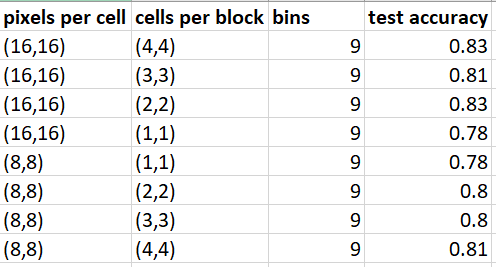


In [ ]:
import os
import cv2

In [ ]:
img_size=216

Training data

In [ ]:
from skimage.feature import hog
X_train=[]
Y_train=[]
i=0
train_path = '/content/drive/My Drive/new data/Train'
for folder in os.listdir(train_path):
  for file in os.listdir(train_path+'/'+folder):
    img=cv2.imread(train_path+'/'+folder+'/'+file, cv2.IMREAD_GRAYSCALE)
    img=cv2.resize(img, (img_size, img_size))
    fd= hog(img, orientations=9, pixels_per_cell=(16, 16), cells_per_block=(2, 2), multichannel=False)
    X_train.append(fd)
    Y_train.append(folder)

cv2.imread: đọc file ảnh vào  
cv2.resize: chuyển ảnh về 216*216  
hog: áp dụng HOG trên ảnh với các tham số như trên

Test data

In [ ]:
X_test=[]
Y_test=[]
test_path='/content/drive/My Drive/new data/Test'
for folder in os.listdir(test_path):
  for file in os.listdir(test_path+'/'+folder):
    img=cv2.imread(test_path+'/'+folder+'/'+file, cv2.IMREAD_GRAYSCALE)
    img=cv2.resize(img, (img_size, img_size))
    fd= hog(img, orientations=9, pixels_per_cell=(16, 16), cells_per_block=(2, 2),multichannel=False)
    X_test.append(fd)
    Y_test.append(folder)

### Vector embedding

**Giới thiệu chung**
* Vector embedding là 1 vector 128 chiều đại diện cho các đặc trưng được trích xuất từ khuôn mặt.
* Nhóm sử dụng thư viện face_recognition để áp dụng quá trính face_embedding (method thư viện cung cấp là face_encoding).
* Thư viện face_recognition là thư viện được xây dựng dựa trên thư viện dlib với ngôn ngữ C++ và huấn luyện với deep learning. Độ chính xác lên đến 99,38% với bộ dữ liệu Label Faces in wild.


**Thực hiện**
* Gọi method face_recognition.face_encoding: bước này sẽ trả về vector 128 chiều. Nó dùng model đã được huấn luyện sẵn để trích xuất đặc trưng và trả về kết quả.
* Những tấm ảnh không thể thực hiện face_encoding được loại bỏ. Nguyên nhân là do không thể xác định được gương mặt trong hình.

![SonTung](https://scontent-hkt1-1.xx.fbcdn.net/v/t1.15752-9/117113925_294361221634277_7655091497491540808_n.jpg?_nc_cat=100&_nc_sid=b96e70&_nc_ohc=pLig07b7u9QAX9jS7Nx&_nc_ht=scontent-hkt1-1.xx&oh=ce05e6e9ca6e219e494c5bfd78dfdacd&oe=5F4D18A3)
![TranThanh](https://scontent-hkt1-1.xx.fbcdn.net/v/t1.15752-9/116798053_314733889894393_4351605890142603523_n.jpg?_nc_cat=100&_nc_sid=b96e70&_nc_ohc=GVbp0iae83sAX9txE3K&_nc_ht=scontent-hkt1-1.xx&oh=e8145dda12a5449844c36d7d7e191ecd&oe=5F4D2612)![NhaPhuong](https://scontent-hkt1-1.xx.fbcdn.net/v/t1.15752-9/116263930_1624167537737003_5444887109200804496_n.jpg?_nc_cat=110&_nc_sid=b96e70&_nc_ohc=6ABj9qSCiSEAX_bL1p7&_nc_ht=scontent-hkt1-1.xx&oh=045ffa3b2bc43bf50926c53201b73c3c&oe=5F4DEFCB)![alt text](https://scontent-hkt1-1.xx.fbcdn.net/v/t1.15752-9/116706547_785185028909061_1920654528452991569_n.jpg?_nc_cat=111&_nc_sid=b96e70&_nc_ohc=jOP6axrk0vMAX-AKOvp&_nc_ht=scontent-hkt1-1.xx&oh=4cf609061aef003aa9147f1e6feb4295&oe=5F4D2C14)![NDLN](https://scontent-hkt1-1.xx.fbcdn.net/v/t1.15752-9/116795757_212530380155008_2825977048398548856_n.jpg?_nc_cat=111&_nc_sid=b96e70&_nc_ohc=5o4UpXI-q2YAX8lAGaT&_nc_ht=scontent-hkt1-1.xx&oh=322d9ae36752fbb8d5897125bef782f3&oe=5F4D3B6D)

In [ ]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 42kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=d0ef29b7640e88c0dcee4e5a7bf279e09b7f4f026fb3c5c72588253838e4fa07
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


Cài đặt thư viện face_recognition

In [ ]:
import face_recognition

In [ ]:
img_size=50

Training data

In [ ]:
x_train=[]
y_train=[]
path_train='/content/drive/My Drive/new data/Train'
i=0
for folder in os.listdir(path_train):
  for file in os.listdir(path_train+'/'+folder):
    file_name = path_train +'/'+folder + '/' + file
    img=cv2.imread(path_train+'/'+folder+'/'+file)
    img=cv2.resize(img, (img_size,img_size))
    img_enc=face_recognition.face_encodings(img)
    if(len(img_enc)!=0):
      x_train.append(img_enc[0])
      y_train.append(folder)
      print(i)
      i+=1
    else: 
      print(file_name)

face_encoding: trả về ma trận 128d đại diện các tính năng gương mặt  
Các tấm ảnh không trả về ma trận sẽ không được thêm vào.

Test data

In [ ]:
x_test=[]
y_test=[]
path_test='/content/drive/My Drive/new data/Test'
i=0
for folder in os.listdir(path_test):
  for file in os.listdir(path_test+'/'+folder):
    file_name = path_test +'/'+folder + '/' + file
    img=cv2.imread(path_test+'/'+folder+'/'+file)
    img=cv2.resize(img, (img_size,img_size))
    img_enc=face_recognition.face_encodings(img)
    if(len(img_enc)!=0):
      x_test.append(img_enc[0])
      y_test.append(folder)
      print(i)
      i+=1
    else: 
      print(file_name)

## Model Machine Learning

### SVM

#### Khái niệm:
* Là một model của Machine Learning, được sử dụng hầu hết ở các bài toán phân loại.
* Thuật toán chủ yếu của nó được sử dụng là tìm đường phân cách giữa các phần phân loại sao cho khoảng cách giữa các điểm trong các phần xa nhất có thể.


####Training Model





Với HOG





In [ ]:
from sklearn import svm
import pickle
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
svm_hog=svm.SVC(kernel='linear').fit(X_train, Y_train)

y_pred=svm_hog.predict(X_test)
print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test,y_pred))

              precision    recall  f1-score   support

         MTP       0.87      0.81      0.84        80
       MyTam       0.69      0.95      0.80        80
        NDLN       0.77      0.76      0.77        80
   NhaPhuong       0.82      0.68      0.74        80
   TranThanh       0.96      0.84      0.89        80

    accuracy                           0.81       400
   macro avg       0.82      0.81      0.81       400
weighted avg       0.82      0.81      0.81       400

[[65  7  5  0  3]
 [ 0 76  3  1  0]
 [ 2  9 61  8  0]
 [ 2 16  8 54  0]
 [ 6  2  2  3 67]]


Với Face_Embedding


In [ ]:
from sklearn.svm import SVC
svm=SVC(kernel='linear').fit(x_train, y_train)

y_pre=svm.predict(x_test)
print(classification_report(y_test, y_pre))
print(confusion_matrix(y_test,y_pre))

              precision    recall  f1-score   support

         MTP       1.00      1.00      1.00        69
       MyTam       1.00      1.00      1.00        78
        NDLN       1.00      1.00      1.00        74
   NhaPhuong       1.00      1.00      1.00        77
   TranThanh       1.00      1.00      1.00        80

    accuracy                           1.00       378
   macro avg       1.00      1.00      1.00       378
weighted avg       1.00      1.00      1.00       378

[[69  0  0  0  0]
 [ 0 78  0  0  0]
 [ 0  0 74  0  0]
 [ 0  0  0 77  0]
 [ 0  0  0  0 80]]


###Logistic Regression

####Khái niệm:
*	Là một model của Machine Learning, thường được sử dụng để xây dựng các mô hình bài toán phân loại.
*	Thuật toán phân loại chủ yếu dựa trên việc xác định mối tương quan giữa các điểm ví dụ nhờ đó mà có thể phân loại dễ dàng.


####Training Model

Với HOG

In [ ]:
from sklearn.linear_model import LogisticRegression
LR_hog = LogisticRegression(random_state=0).fit(X_train, Y_train)

y_pred=LR_hog.predict(X_test)
print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test,y_pred))

              precision    recall  f1-score   support

         MTP       0.92      0.85      0.88        80
       MyTam       0.74      0.96      0.84        80
        NDLN       0.80      0.69      0.74        80
   NhaPhuong       0.77      0.76      0.77        80
   TranThanh       0.96      0.89      0.92        80

    accuracy                           0.83       400
   macro avg       0.84      0.83      0.83       400
weighted avg       0.84      0.83      0.83       400

[[68  6  4  0  2]
 [ 0 77  2  1  0]
 [ 1 10 55 13  1]
 [ 2 11  6 61  0]
 [ 3  0  2  4 71]]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Với Face_embedding

In [ ]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression().fit(x_train, y_train)

y_pre=LR.predict(x_test)
print(classification_report(y_test, y_pre))
print(confusion_matrix(y_test,y_pre))

              precision    recall  f1-score   support

         MTP       1.00      1.00      1.00        69
       MyTam       1.00      1.00      1.00        78
        NDLN       1.00      1.00      1.00        74
   NhaPhuong       1.00      1.00      1.00        77
   TranThanh       1.00      1.00      1.00        80

    accuracy                           1.00       378
   macro avg       1.00      1.00      1.00       378
weighted avg       1.00      1.00      1.00       378

[[69  0  0  0  0]
 [ 0 78  0  0  0]
 [ 0  0 74  0  0]
 [ 0  0  0 77  0]
 [ 0  0  0  0 80]]


###KNN

####Khái niệm
*	Là một model của Machine Learning, thường được sử dụng để xây dựng các mô hình bài toán phân loại.
*	Thuật toán phân loại dựa trên khoảng cách Euclid của điểm dữ liệu so với n điểm gần đó  nhất, kết quả trả về sẽ là bài toàn phân loại điểm dữ liệu trên vào vùng phân loại sao cho khoảng cách của điểm đó tới các điểm trong vùng phân loại là nhỏ nhất.

-->Model rất nhạy cảm với nhiễu, nhiều càng nhiều, độ sai sót càng lớn.






####Training Model

Với HOG

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_hog = KNeighborsClassifier(n_neighbors=5)
knn_hog.fit(X_train, Y_train)

y_pred=neigh.predict(X_test)
print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test,y_pred))

              precision    recall  f1-score   support

         MTP       0.78      0.62      0.69        80
       MyTam       0.57      0.72      0.64        80
        NDLN       0.65      0.64      0.65        80
   NhaPhuong       0.71      0.64      0.67        80
   TranThanh       0.78      0.82      0.80        80

    accuracy                           0.69       400
   macro avg       0.70      0.69      0.69       400
weighted avg       0.70      0.69      0.69       400

[[50  9  4  3 14]
 [ 4 58 10  6  2]
 [ 4 13 51 10  2]
 [ 2 17  9 51  1]
 [ 4  4  4  2 66]]


Với Face_embedding

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(x_train, y_train)

y_pred=neigh.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

         MTP       1.00      0.99      0.99        69
       MyTam       1.00      0.97      0.99        78
        NDLN       0.97      0.97      0.97        74
   NhaPhuong       0.96      1.00      0.98        77
   TranThanh       1.00      1.00      1.00        80

    accuracy                           0.99       378
   macro avg       0.99      0.99      0.99       378
weighted avg       0.99      0.99      0.99       378

[[68  0  0  1  0]
 [ 0 76  2  0  0]
 [ 0  0 72  2  0]
 [ 0  0  0 77  0]
 [ 0  0  0  0 80]]


###Decision Tree

####Khái niệm:
*	Là một model của Machine Learning, thường được sử dụng để xây dựng các mô hình bài toán phân loại.
*	Được phân loại dựa trên thuộc tính của các node.


####Trainning Model

Với HOG

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)

y_pred=clf.predict(X_test)
print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test,y_pred))

              precision    recall  f1-score   support

         MTP       0.45      0.41      0.43        80
       MyTam       0.52      0.56      0.54        80
        NDLN       0.35      0.36      0.35        80
   NhaPhuong       0.39      0.40      0.40        80
   TranThanh       0.47      0.44      0.45        80

    accuracy                           0.43       400
   macro avg       0.44      0.43      0.43       400
weighted avg       0.44      0.43      0.43       400

[[33  7 19  8 13]
 [ 4 45 15  6 10]
 [15  8 29 20  8]
 [13 15 11 32  9]
 [ 8 11 10 16 35]]


Với Face_embedding

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(x_train, y_train)

y_pred=clf.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

         MTP       0.86      0.88      0.87        69
       MyTam       0.87      0.96      0.91        78
        NDLN       0.80      0.74      0.77        74
   NhaPhuong       0.78      0.79      0.79        77
   TranThanh       0.96      0.89      0.92        80

    accuracy                           0.85       378
   macro avg       0.85      0.85      0.85       378
weighted avg       0.86      0.85      0.85       378

[[61  0  3  3  2]
 [ 2 75  1  0  0]
 [ 1  8 55 10  0]
 [ 3  3  9 61  1]
 [ 4  0  1  4 71]]


# **Demo**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 41kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=ba76663ddb39cc3a772664d71638a4cfdf6b627082fc4528dea7302e63bab9c4
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [ ]:
import face_recognition
from google.colab.patches import cv2_imshow
from skimage.feature import hog
import pickle
import cv2
from skimage import io

face_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')

Đầu tiên khai báo các thư viện cần thiết và đọc tệp tin xml 'haarcascade_frontalface_default.xml'

B1: Đầu vào sẽ là đường dẫn *url* của bức ảnh

B2: Ảnh gốc sẽ được lưu trong biến **img** và tạo ảnh xám từ ảnh gốc vào biến **gray**

B3: Sử dụng phương thức **detectMultiScale** để phát hiện khuôn mặt trong bức ảnh xám, mỗi khuôn mặt được xác định bởi tứ giác có tọa độ (x, y) và width và height

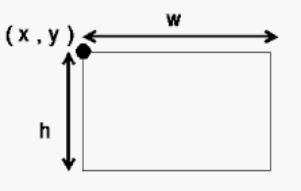

B4: Sau khi tính toán thì dữ liệu các khuôn mặt đã có trong biến **faces**, sử dụng mô hình đã huấn luyện để xác định danh tính và vẽ lên bức ảnh gốc

## **Demo với HOG**

In [ ]:
LRH=pickle.load(open('/content/drive/My Drive/Kết quả 400 ảnh/HOG/LR_hog.pkl','rb'))

def demo_hog(url):
  img = io.imread(url)
  img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  faces = face_cascade.detectMultiScale(gray, 1.1, 5)
  for (x, y, w, h) in faces:
    #Xử lý trên mỗi khuôn mặt được phát hiện
    new_img=img[y:y+h, x:x+w]
    new_img=cv2.cvtColor(new_img, cv2.COLOR_BGR2GRAY)
    new_img=cv2.resize(new_img, (216,216))
    fd= hog(new_img, orientations=9, pixels_per_cell=(16, 16), cells_per_block=(2, 2), multichannel=False)
    name=LRH.predict(fd.reshape(1,-1))[0]
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img, name,(x-5,y-10), font, 1, (200,255,155),2)
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 1)
  cv2_imshow(img)

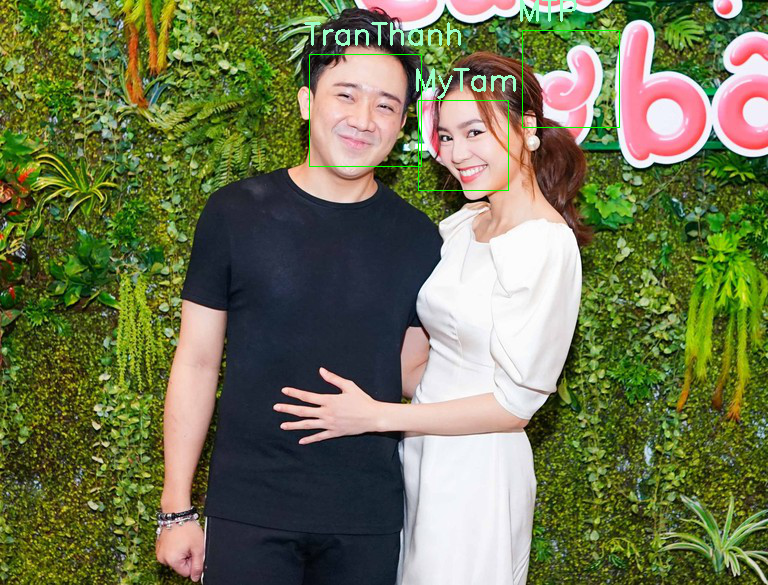

In [ ]:
demo_hog('https://image.thanhnien.vn/768/uploaded/tuyenth/2019_01_19/cualaivobauthankyouparty12_ittq.jpg')

## **Demo với Face embedding**

In [ ]:
LR=pickle.load(open('/content/drive/My Drive/Kết quả 400 ảnh/Face Encoding/LR.pkl', 'rb'))

def demo_fe(url):
  img = io.imread(url)
  img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  faces = face_cascade.detectMultiScale(gray, 1.1, 5)
  for (x, y, w, h) in faces:
    new_img=img[y:y+h, x:x+w]
    new_img=cv2.resize(new_img, (50, 50))
    img_enc=face_recognition.face_encodings(new_img)
    if(len(img_enc)!=0):
      name=LR.predict(img_enc[0].reshape(1,-1))[0]
      font = cv2.FONT_HERSHEY_SIMPLEX
      cv2.putText(img, name,(x-5,y-10), font, 1, (200,255,155),2)
      cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0))
  cv2_imshow(img)

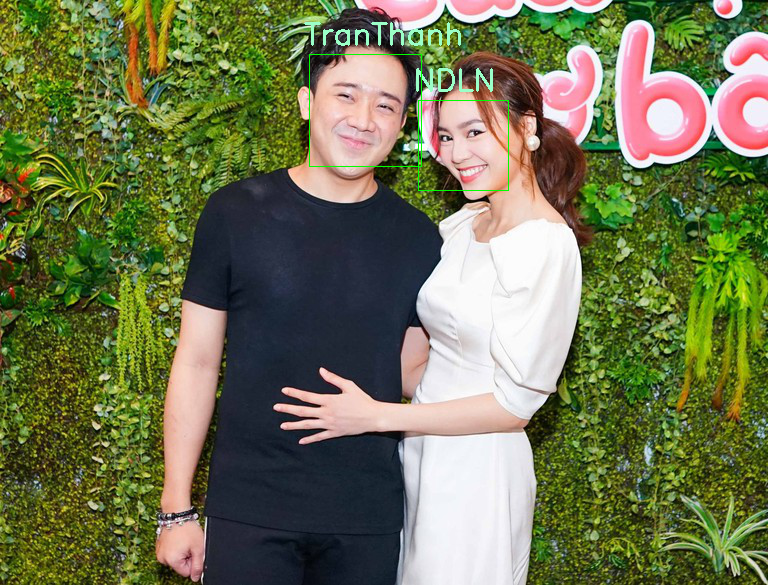

In [ ]:
demo_fe('https://image.thanhnien.vn/768/uploaded/tuyenth/2019_01_19/cualaivobauthankyouparty12_ittq.jpg')

**cv2.putText(img, name,(x-5,y-10), font, 1, (200,255,155),2)**
*   img: hình cần ghi chữ.
*   name: kí tự cần ghi
*   (x-5, y-10): tọa độ của kí tự trên hình
*   font: loại phông chữ.
*   1: hệ số tỉ lệ phông chữ
*   (200, 255, 155): màu của chuỗi kí tự theo hệ BGR
*   2: độ dày của kí tự.

**cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0))**
*   img: hình cần vẽ.
*   (x, y), (x+w, y+h): tọa độ trái trên và phải dưới của tứ giác
*   (0,255,0): màu của khung viền tứ giác theo hệ BGR. (0,255,0) là màu xanh. 

# **Nhận xét**
* Sau khi thực hiện với 2 cách thức trên thì kết quả cho ra là Vector embedding cho kết quả tốt hơn khá nhiều so với HOG.
* Nguyên nhân:
  1. HOG là phương pháp nghiêng về mô tả hình dạng và sự xuất hiện của vật thể trong ảnh hơn là sự khác biệt của các vật thể. 
  2. Face embedding sẽ cho 1 vector 128d. Những gương mặt giống nhau sẽ có khoảng cách euclid distance nhỏ và ngược lại, những gương mặt khác nhau sẽ có euclid distacne lớn. Do đó kết quả sẽ cho ra tốt hơn với phương pháp trên. Mặt khác, đây là model đã được xây dựng sẵn với deep learning và bộ dữ liệu lớn nên sẽ cho accuracy cao hơn so với việc trích xuất đặc trưng theo dạng HOG.
  •	Dựa trên các model ta có nhận xét:
*Model cho kết quả tốt nhất: 
 *	Logistic Regression (0.83, 1.00 lần lượt của HOG và Face_embedding) <-- model được train dựa trên các đặc trưng riêng của khuôn mặt (khoảng cách Euclid), với các đặc trưng đã trích xuất, các khuôn mặt đã loại bỏ hầu hết những đặc trưng không quan trọng --> model có accuracy khá cao.
 * SVM: (0.81, 1.00 lần lượt của HOG và Face_embedding)  model được phân loại dựa trên khoảng cách giữa các điểm đặc trưng khuôn mặt so với đường phần chia sao cho khoảng cách đó là lớn nhất có thể  model có accuracy tương đối cao.
*	Model cho các kết quả thấp:
 *	K – Neareast Neighbors (0.69, 0.99 lần lượt của HOG và Face_embedding) <-- model phân loại dựa trên khoảng cách Euclid của điểm trong tập train so với n điểm gần nhất bất kì --> model rất nhạy cảm với nhiễu, nếu nhiễu càng nhiều càng dẫn đến sai sót càng lớn.
 *	Decision Tree: (0.43, 0.82 lần lượt của HOG và Face_embedding) <-- model phân loại dựa trên đặc trưng được đưa ra và phụ thuộc rất nhiều vào nút cha --> khi xảy ra nhiễu dẫn đến toàn bộ model trả về kết quả sai gây ra accuracy thấp --> model có accuracy thấp nhất.


# **Kết Luận**
•	Với 2 cách feature extracting ta có thể thấy:
 *	HOG cho kết quả tương đối tốt, phù hợp với bài toán nhận diện khuôn mặt --> với các bài toán xác định khuôn mặt, việc sử dụng HOG cho kết quả rất khả quan.
 *	Face_embedding cho kết quả tốt hơn --> nếu muốn xây dựng một ứng dụng nhận diện khuôn mặt với độ chính xác cao, face_embedding có thể là sự lựa chọn ưu tiên.
